# CSE 152A Winter 2025 – Assignment 2


- Assignment Published On: **Wednesday, January 29, 2025**

- Due On: **Sun, February 9 at 11:59 PM (Pacific Time)**

## Instructions

Please answer the questions below using Python in the attached Jupyter notebook and follow the guidelines below:
 
- This assignment must be completed **individually**. For more details, please follow the Academic Integrity Policy and Collaboration Policy posted on lecture slides.

- All the solutions must be written in this Jupyter notebook.

- After finishing the assignment in the notebook, please export the notebook as a PDF and submit both the notebook and the PDF (i.e. the `.ipynb` and the `.pdf` files) on Gradescope. (Note: Please ensure that all images/plots are clear in the pdf).

- You may use basic algebra packages (e.g. `NumPy`, `SciPy`, etc) but you are not allowed to use open source codes that directly solve the problems. Feel free to ask the instructor and the teaching assistants if you are unsure about the packages to use.

- It is highly recommended that you begin working on this assignment early.

- Make sure that you read hints for questions (wherever given).

**Late Policy:** Assignments submitted late will receive a 25% grade reduction for each 12 hours late (that is, 50% per day).

## Submission Instructions

- You must submit both the `.ipynb` file and a `.pdf` version of your notebook.

- Some methods to generate PDF
    -  File -> Save and Export Notebook As -> `.html` -> Print -> Save as PDF
    -  Using [nbconvert](https://nbconvert.readthedocs.io/en/latest/)


- We will be grading primarily from your notebook.
    - It is your responsibility to make sure that your code and outputs are visible.
 
## Virtual Environment

### Initial Set-up
You can utilize a virtual environment (`venv`) in order to manage dependencies: [venv link](https://docs.python.org/3/library/venv.html) along with the libraries specified in `requirements.txt`.

To create the environment:
```
python -m venv cse152a_hw2
```

To activate the environment:

- MacOS/Linux Users:
    ```
    source ./cse152a_hw2/bin/activate
    ```

- Windows Uers:
    ```
    cse152a_hw2\scripts\activate.bat
    ```

Once the virtual environment is activated, you can install the libraries according to `requirements.txt` like so:
```
pip install -r requirements.txt
```

You should then add the environment to jupyter notebook like so:
```
python -m ipykernel install --user --name=cse152a_hw2
```

To deactivate the environment, simply:
```
deactivate
```

This assumes you have Python installed already.

### Using the venv
Once you've installed all the requirements within the venv, you can deactivate and would no longer need to repeat the above steps. You can simply open a Jupyter instance.

Opening a Jupyter instance:
```
jupyter-lab
```

Ensure that you select the correct kernel (named `cse152a_hw2` if you followed the steps above) by clicking Kernel -> Change Kernel.

In [3]:
# Importing packages
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy 

from scipy.signal import convolve2d
from skimage import io

import pickle

## Problem 1: Edge & Corner Detection [23 pts]

### Problem 1.1: Edge Detection [8 pts]

In this problem, you will write a function to perform edge detection. The following steps need to be implemented.

- **Smoothing [2 pt]:** First, we need to smooth the images to prevent noise from being considered edges. For this problem, use a 9x9 Gaussian kernel filter with $\sigma = 1.2$ to smooth the images. Complete the `smooth` function.

- **Gradient Computation [3+3 pts]:** After you have finished smoothing, find the image gradient in the horizontal and vertical directions. Compute the gradient magnitude image as $|G| = \sqrt{G_x^2 + G_y^2}$  and gradient direction as $tan^{-1}(G_y/G_x)$.

Compute the images after each step. Show each of the intermediate steps and label your images accordingly.

In total, there should be four output images (original, smoothed, gradient magnitude, gradient direction).

**For this question, use the image `geisel.jpeg`.**

### **Hints**:
- For calculating the gradient direction, consider using np.arctan2 to give a range [-180, 180] in degrees (https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html).

- $G_x$ and $G_y$ are the image gradients along the x and y directions respectively. We can calculate these using convolution just like we did in HW1. You can use scipy's implementation of convolve through `convolve2d` which is imported for you. As mentioned in HW1, you can use these kernels for convolution:

    - $K_x = \begin{bmatrix} 0 & 0 & 0\\ 0.5 & 0 & -0.5\\ 0 & 0 & 0 \end{bmatrix}$
    - $K_y = \begin{bmatrix} 0 & 0.5 & 0\\ 0 & 0 & 0\\ 0 & -0.5 & 0 \end{bmatrix}$

Original:


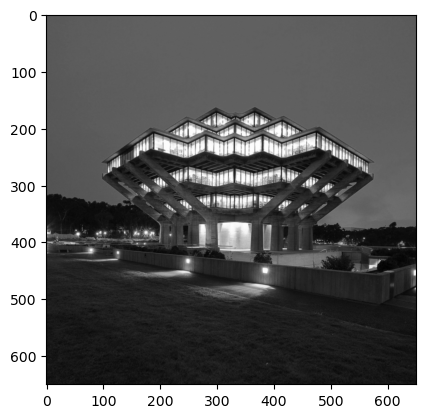

Smoothed:


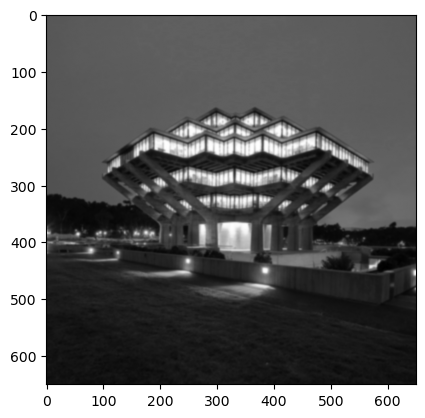

Gradient magnitude:


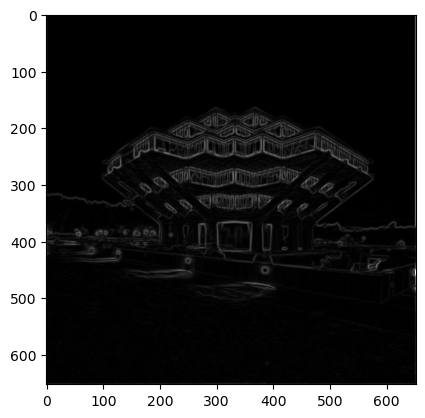

Gradient direction:


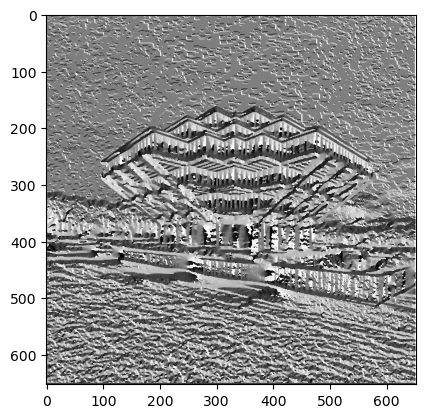

In [7]:
def gaussian2d(filter_size=1, sig=1.0):
    """
    Creates 2D Gaussian kernel with side length `filter_size` and a sigma of `sig`.
    Source: https://stackoverflow.com/a/43346070
    """
    ax = np.arange(-filter_size // 2 + 1., filter_size // 2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-0.5 * (np.square(xx) + np.square(yy)) / np.square(sig))
    return kernel / np.sum(kernel)

def edge_detect(image):
    """
    Perform edge detection on the image.
    """
    smoothed = smooth(image)
    g_mag, g_theta = gradient(smoothed)
    return smoothed, g_mag, g_theta

def smooth(image):
    """
    Smoothes the image by using a 2D Gaussian kernel.
    
    Args:
        image: input image (h,w)

    Returns:
        smooth_image: smoothed version of input image (h,w)
    """
    smooth_image = np.zeros_like(image)
    filter_size = 9 # Kernel size
    sig = 1.2 # STD
    
    ### YOUR CODE HERE
    r = (filter_size-1)//2
    smooth_image = scipy.ndimage.gaussian_filter(image, sigma=sig, radius=r)


    ### END YOUR CODE
    return smooth_image

def gradient(image):
    """
    Computes a gradient direction image and a gradient magnitude image.

    Args:
        image: input image (h,w)

    Returns:
        g_mag: gradient magnitude (h,w)
        g_theta: gradient direction (h,w)
    """
    g_mag = np.zeros_like(image)
    g_theta = np.zeros_like(image)

    ### YOUR CODE HERE
    k_x = np.array([[0,0,0],[0.5,0,-0.5],[0,0,0]])
    k_y = np.array([[0,0.5,0],[0,0,0],[0,-0.5,0]])
    g_x = convolve2d(image, k_x)
    g_y = convolve2d(image, k_y)
    g_mag = np.sqrt(g_x**2 + g_y**2)
    g_theta = np.arctan2(g_y, g_x)



    ### END YOUR CODE
    return g_mag, g_theta

# Plotting
# Load image in grayscale
image = io.imread("./imgs/geisel.jpeg", as_gray=True)
smoothed, g_mag, g_theta = edge_detect(image)
print('Original:')
plt.imshow(image, cmap='gray')
plt.show()

print('Smoothed:')
plt.imshow(smoothed, cmap='gray')
plt.show()

print('Gradient magnitude:')
plt.imshow(g_mag, cmap='gray')
plt.show()

print('Gradient direction:')
plt.imshow(g_theta, cmap='gray')
plt.show()

### Problem 1.2: Corner Detection [15 pts]

Next, you will implement a corner detector to detect corner-like features in the image.

We can achieve this by looking at the minor eigenvalue of the second-moment matrix of local regions within the image. You need fill in the function `corner_detect` and call it with the correct arguments.

**For each image, you should detect 100 corners with the largest minor eigenvalue using a Gaussian standard deviation of 2.0 and a window size of 13, and you should also report the correponding threshold on the minor eigenvalues.**

Display the corners using the show_corners_result function and plot the minor eigenvalue images using the show_eigen_images function.

**For this question, we will use images `im0.png` and `im1.png`**
Data obtained from the Middlebury dataset (https://vision.middlebury.edu/stereo/data/)

### **Hints**:

- Again, you can use convolution to compute the image gradients.

    - $K_x = \begin{bmatrix} 0 & 0 & 0\\ 0.5 & 0 & -0.5\\ 0 & 0 & 0 \end{bmatrix}$
    - $K_y = \begin{bmatrix} 0 & 0.5 & 0\\ 0 & 0 & 0\\ 0 & -0.5 & 0 \end{bmatrix}$

- The corners obtained in your result may not land exactly on top of the corner you see in the image. This is expected and is because with the material we've covered, we have only found the location of the region with the highest minor eigenvalue. We have not yet narrowed down the actual location within the window.

- The approach discussed in lecture gives us "corner-like" features. This means that you should not expect that all corners would land on only corners that you might expect. Corners would appear in locations in the image as long as it fits the mathematical derivation we've discussed. It is normal for there to be some variance.
  
- For filtering/sliding windows, you may find it easy to think about the center pixel of odd length window sizes. You can use this to think out how to index through the image matrix.

- The threshold is defined based on the minor eigenvalues of the second-momemn matrix of local regions within the image. It is used to ensure that only 100 corners-like features will be selected in the final display. 

In [19]:
def corner_detect(image, n_corners, smooth_std, window_size):
    """
    Detect corners on a given image

    Args:
        image: 2D grayscale image on which to detect corners
        n_corners: Total number of corners to be extracted
        smooth_std: Standard deviation of the Gaussian smoothing kernel
        window_size: Window size for Gaussian smoothing kernel,
                     corner detection, and nonmaximum suppresion

    Returns:
        minor_eig_image: The minor eigenvalue image (same shape as image)
        corners: Detected corners (in x-y coordinates) in a numpy array of shape (n_corners, 2)
    """
    minor_eig_image = np.zeros_like(image)
    corners = np.zeros((n_corners, 2))
    threshold = 0

    ### YOUR CODE HERE
    
    ### END YOUR CODE
    return minor_eig_image, corners, threshold

In [20]:
def show_eigen_images(imgs):
    print("Minor Eigen value images")
    fig = plt.figure(figsize=(20, 20))
    # Plot image 1
    plt.subplot(1,2,1)
    plt.imshow(imgs[0], cmap='gray')
    plt.title('Image 0')

    # Plot image 2
    plt.subplot(1,2,2)
    plt.imshow(imgs[1], cmap='gray')
    plt.title('Image 1')
    
    plt.show()

def show_corners_result(imgs, corners, window_size):
    print("Detected Corners")
    fig = plt.figure(figsize=(20, 20))
    ax1 = fig.add_subplot(221)
    ax1.imshow(imgs[0], cmap='gray')
    ax1.scatter(corners[0][:, 0], corners[0][:, 1], s=25, edgecolors='r', facecolors='none')
    ax1.title.set_text("Image 0")

    ax2 = fig.add_subplot(222)
    ax2.imshow(imgs[1], cmap='gray')
    ax2.scatter(corners[1][:, 0], corners[1][:, 1], s=25, edgecolors='r', facecolors='none')
    ax2.title.set_text("Image 1")
    
    plt.show()

### You may want to modify these parameters here..

In [ ]:
# Detect corners on the two provided images

# You may want to change these parameters accordingly
n_corners = 1
smooth_std = 1
window_size = 1

# Read images and detect corners on images
imgs = []
eig_imgs = []
corners = []
thresholds = []
for i in range(2):
    img = io.imread(f"./imgs/im{i}.png", as_gray=True)
    imgs.append(img)
    #img = io.imread('im' + str(i) + '.png')
    minor_eig_image, corners_vals, threshold = corner_detect(imgs[-1], n_corners, smooth_std, window_size)
    eig_imgs.append(minor_eig_image)
    corners.append(corners_vals)
    thresholds.append(threshold)

# Show the results
# This may take a few seconds to run
show_eigen_images(eig_imgs)
show_corners_result(imgs, corners, window_size)
print("The threshold for the first image is {:.3f}, and for the second image is {:.3f}".format(thresholds[0], thresholds[1]))

## Problem 2: Theory [20 points]
### Problem 2.1: Epipolar Geometry [10 points]

Consider two cameras whose image planes are the z=4 plane, and whose focal points are at (-4, 0, 0) and (6, 0, 0). See Fig 1.1 below. We'll call a point in the first camera (x, y), and a point in the second camera (u, v). Points in each camera are relative to the camera center. So, for example if (x, y) = (0, 0), this is really the point (-4, 0, 4) in world coordinates, while if (u, v) = (0, 0) this is the point (6, 0, 4).

Suppose the point $(x,y)=(2,3)$ is matched to the point $(u,v)=(1,3)$. What is the 3D location of this point?

### **Hint**:
One way of solving this is to think about the intersection of the rays.

![fig 2.1](./figs/p2_1_figure.png)

### Problem 2.2: The Epipolar Constraint [5 points]

Suppose two cameras fixate on a point $P$ in space such that their principal axes intersect at that point. (See the fig. 1.2 below.) Show that if the image coordinates are normalized so that the coordinate origin (0, 0) coincides with the principal point, then the $F_{33}$ element of the fundamental matrix is zero.

![fig 2.2](./figs/ec_diagram.png)

In the figure, $C1$ and $C2$ are the optical centers. The principal axes intersect at point $P$.

### **Hint**:
 
You will be required to convert the points into homogeneous coordinates.

### Problem 2.3: Essential Matrix [5 points]

Suppose a stereo rig is formed of two cameras: the rotation matrix and translation vector are given to you. Please write down the essential matrix. Also, compute the rank of the essential matrix using SVD, i.e., the number of nonzero singular values. (Note that if you get a singular value $s$ of a very small number in your calculation, e.g., $s<=1e-15$, you can treat it as zero singular value). 


$$ R=
\begin{bmatrix}
\frac{\sqrt{2}}{2} & -\frac{\sqrt{2}}{2} & 0 \\
\frac{\sqrt{2}}{2} & \frac{\sqrt{2}}{2} & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

$$ t=
\begin{bmatrix}
5 \\ -3 \\ 2
\end{bmatrix}
$$



### **Hint**:
 
You may find the following implementation of SVD useful: https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

## Problem 3: SSD (Sum Squared Distance) and NCC (Normalized Cross-Correlation) Matching [21 points]
In this part, you have to write two functions <code>ssd_match</code> and <code>ncc_match</code> that implement the computation of the matching score for two given windows with SSD and NCC metrics respectively.

### Problem 3.1: SSD (Sum Squared Distance) Matching [5 points]
Complete the function <code>ssd_match</code>:  
SSD = $\sum_{x,y}|W_1(x,y)-W_2(x,y)|^2$

In [9]:
def ssd_match(img1, img2, c1, c2, R):
    """
    Compute SSD of two windows.
    
    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in x-y coordinates) of the window in image 1.
        c2: Center (in x-y coordinates) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        SSD matching score for two input windows (a scalar value).
    """
    ### YOUR CODE HERE

    ### END YOUR CODE
    return matching_score

In [ ]:
# Here is the code for you to test your implementation
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])

result1 = ssd_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1)
# should print 20
assert(result1 == 20)
print(f"Result 1: {result1}")

result2 = ssd_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1)
# should print 30
assert(result2 == 30)
print(f"Result 2: {result2}")

result3 = ssd_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1)
# should print 46
assert(result3 == 46)
print(f"Result 3: {result3}")

### Problem 3.2: NCC (Normalized Cross-Correlation) Matching [8 points]
Complete the function <code>ncc_match</code>:

NCC = $\sum_{x,y}\tilde{W_1} (x,y)\cdot \tilde{W_2} (x,y)$ 

where $\tilde{W} = \frac{W - \overline{W}}{\sqrt{\sum_{x,y}(W(x,y) - \overline{W})^2}}$ is a mean-shifted and normalized version of the window and $\overline{W}$ is the mean pixel value in the window W.

There may be other slightly different formulations of NCC, however you should utilize this one for this assignment.

In [11]:
def ncc_match(img1, img2, c1, c2, R):
    """
    Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        c1: Center (in image coordinate) of the window in image 1.
        c2: Center (in image coordinate) of the window in image 2.
        R: R is the radius of the patch, 2 * R + 1 is the window size

    Returns:
        NCC matching score for two input windows.

    """
    ### YOUR CODE HERE

    ### END YOUR CODE

    return matching_score

In [ ]:
# Here is the code for you to test your implementation
img1 = np.array([[1, 2, 3, 4], [4, 5, 6, 8], [7, 8, 9, 4]])
img2 = np.array([[1, 2, 1, 3], [6, 5, 4, 4], [9, 8, 7, 3]])

result4 = ncc_match(img1, img2, np.array([1, 1]), np.array([1, 1]), 1)
# should print 0.8546
print(f"Result 4: {result4}")

result5 = ncc_match(img1, img2, np.array([2, 1]), np.array([2, 1]), 1)
# should print 0.8457
print(f"Result 5: {result5}")

result6 = ncc_match(img1, img2, np.array([1, 1]), np.array([2, 1]), 1)
# should print 0.6258
print(f"Result 6: {result6}")


### Problem 3.3: Naive Matching [8 points]

Given the corner points detected and the NCC matching function, we are ready to start finding correspondences. One naive strategy is to try and find the best match between the two sets of corner points. Write a function that does this, namely, for each corner in image1, find the best match from the detected corners in image2 (or, if the NCC match score is too low, then return no match for that point). 

Write a function <code>naive_matching</code> and call it as below. Examine your results for 20 detected corners in each image. 

In [13]:
def naive_matching(img1, img2, corners1, corners2, R, NCCth):
    """
    Compute NCC given two windows.

    Args:
        img1: Image 1.
        img2: Image 2.
        corners1: Corners in image 1 (nx2)
        corners2: Corners in image 2 (nx2)
        R: NCC matching radius
        NCCth: NCC matching score threshold

    Returns:
        matching: NCC matching returns a list of tuple (c1, c2), 
                  c1 is the 1x2 corner location in image 1, 
                  c2 is the 1x2 corner location in image 2. 

    """
    
    ### YOUR CODE HERE

    ### END YOUR CODE

    return matching

In [14]:
def rgb2gray(rgb):
    """ 
    Convert rgb image to grayscale.
    """
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

# Detect corners on warrior and matrix sets
# You are free to modify the parameters if you wish
n_corners = 20
smooth_std = 1
window_size = 17

# Read images and detect corners on the images
imgs_mat = []
crns_mat = []
imgs_war = []
crns_war = []

for i in range(2):
    img_mat = io.imread('./imgs/p4/matrix/matrix' + str(i) + '.png')
    imgs_mat.append(rgb2gray(img_mat))
    img_war = io.imread('./imgs/p4/warrior/warrior' + str(i) + '.png')
    imgs_war.append(rgb2gray(img_war))

In [15]:
# Match corners (May need to modify the threshold below)
crnsmatf=open('./imgs/p3/crns_mat.pkl','rb')
crns_mat=pickle.load(crnsmatf)
crnswarf=open('./imgs/p3/crns_war.pkl','rb')
crns_war=pickle.load(crnswarf)
R = 120
NCCth = 0.6  # MAY NEED TO MODIFY YOUR THRESHOLD HERE
matching_mat = naive_matching(imgs_mat[0]/255, imgs_mat[1]/255, crns_mat[0], crns_mat[1], R, NCCth)
matching_war = naive_matching(imgs_war[0]/255, imgs_war[1]/255, crns_war[0], crns_war[1], R, NCCth)

In [ ]:
# Plot matching result
def show_matching_result(img1, img2, matching):
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(np.hstack((img1, img2)), cmap='gray') # two dino images are of different sizes, resize one before use
    for p1, p2 in matching:
        plt.scatter(p1[0], p1[1], s=35, edgecolors='r', facecolors='none')
        plt.scatter(p2[0] + img1.shape[1], p2[1], s=35, edgecolors='r', facecolors='none')
        plt.plot([p1[0], p2[0] + img1.shape[1]], [p1[1], p2[1]])
    #plt.savefig('matching.png')
    plt.show()

print("Number of Corners:", n_corners)
show_matching_result(imgs_mat[0], imgs_mat[1], matching_mat)
show_matching_result(imgs_war[0], imgs_war[1], matching_war)

## Problem 4: Epipolar Geometry [13 points]

As shown in Problem 2, the naive mathing algorithm is simple. The weakness of this method comes from the high matching complexity. In this problem, we will explore how to visualize epipolar geometry constraint in the form of epipolar lines. This constraint we could to rectify the images and build a better matching algorithm (outside of the scope of this assignment).

### Problem 4.1: Fundamental matrix [10 points]
Complete the <code>compute_fundamental</code> function below using the 8-point algorithm described in lecture. Note that the normalization of the corner points is handled in the <code>fundamental_matrix</code> function. We have handled constraining $F$ to be of rank 2 for you.

### **Hint**:
This portion requires you to build the constraint matrix $A$ for the 8-point algorithm. We can solve for the fundamental matrix by applying SVD to this matrix. Your task will be to construct the equation given below in code and compute the linear least square solution through SVD.

When you try to find the non-trivial solution to a linear system of equations $Af=0$, you can use singular value decomposition where f will be given by the singular vector corresponding to the smallest singular value. It would be stored in the last column of $V$. You may use Numpy's SVD implementation, but be aware that it returns $V^T$, and not $V$.

In [25]:
def compute_fundamental(x1, x2):
    """
    Computes the fundamental matrix from corresponding points 
    (x1,x2 3xn arrays) using the 8 point algorithm.
        
    Construct the A matrix according to lecture
    and solve the system of equations for the entries of the fundamental matrix.

    Args:
        x1: Point correspondences from img1 (3xn)
        x2: Point correspondences from img2 (3xn)
    
    Returns:
        Fundamental Matrix (3x3)
    """
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")
    
    ### YOUR CODE HERE

    ### END YOUR CODE
    
    # constrain F
    # make rank 2 by zeroing out last singular value
    U,S,V = np.linalg.svd(F)
    S[2] = 0
    F = np.dot(U,np.dot(np.diag(S),V))
    
    return F/F[2,2]

In [18]:
def fundamental_matrix(x1,x2):
    # Normalization of the corner points is handled here
    n = x1.shape[1]
    if x2.shape[1] != n:
        raise ValueError("Number of points don't match.")

    # normalize image coordinates
    x1 = x1 / x1[2]
    mean_1 = np.mean(x1[:2],axis=1)
    S1 = np.sqrt(2) / np.std(x1[:2])
    T1 = np.array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    x1 = np.dot(T1,x1)
    
    x2 = x2 / x2[2]
    mean_2 = np.mean(x2[:2],axis=1)
    S2 = np.sqrt(2) / np.std(x2[:2])
    T2 = np.array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    x2 = np.dot(T2,x2)

    # compute F with the normalized coordinates
    F = compute_fundamental(x1,x2)

    # reverse normalization
    F = np.dot(T2.T,np.dot(F,T1))

    return F/F[2,2]

In [ ]:
# Here is the code for you to test your implementation
cor1 = np.load("./imgs/p4/"+'dino'+"/cor1.npy")
cor2 = np.load("./imgs/p4/"+'dino'+"/cor2.npy")
print(fundamental_matrix(cor1,cor2))
# Should print 
#[[ 4.00502510e-07 -2.69900666e-06  1.37819769e-03]
# [ 3.09619039e-06 -1.00972419e-08 -7.29675791e-03]
# [-2.86966053e-03  6.70452915e-03  1.00000000e+00]]

### Problem 4.2: Plot Epipolar Lines [3 points]

**You do not need to code anything here. Run the cells below and look at your results**

Using this fundamental matrix, we can plot the epipolar lines in both images for each image pair. For this part, you just have to use the function <code>plot_epipolar_lines</code> and check for the correctness of <code>compute_fundamental</code> that you have already written in Q4.1). Show your result for matrix and warrior as exemplified by the figure below. 

![Dino Epipolar 1](./figs/dinoEpi1.png)
![Dino Epipolar 2](./figs/dinoEpi2.png)

In [20]:
def plot_epipolar_lines(img1, img2, cor1, cor2):
    """
    Plot epipolar lines on image given image, corners

    Args:
        img1: Image 1.
        img2: Image 2.
        cor1: Corners in homogeneous image coordinate in image 1 (3xn)
        cor2: Corners in homogeneous image coordinate in image 2 (3xn)

    """
    
    assert cor1.shape[0] == 3
    assert cor2.shape[0] == 3
    assert cor1.shape == cor2.shape
    
    F = fundamental_matrix(cor1, cor2)
        
    # epipole in image 1 is the solution to Fe = 0
    U,S,V = np.linalg.svd(F)
    e1 = V[-1]
    e1 /= e1[-1]
    
    # epipole in image 2 is the solution to F.Te = 0
    U,S,V = np.linalg.svd(F.T)
    e2 = V[-1]
    e2 /= e2[-1]

    plot_epipoles = False
    
    # Plot epipolar lines in the first image
    # There is an epipolar line for each corner
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(img1, cmap='gray')
    h, w = img1.shape[:2]
    for c2 in cor2.T:
        # epipolar line is (F.T * c2) dot (x, y, 1) = 0
        epi_line = np.dot(F.T, c2)
        a, b, c = epi_line # ax + by + c = 0, y = -a/b * x - c/b
        x = np.arange(w)
        y = (-a / b) * x - (c / b)
        x = np.array([x[i] for i in range(x.size) if y[i] >=0 and y[i] < h - 1])
        y = np.array([y[i] for i in range(y.size) if y[i] >=0 and y[i] < h - 1])
        plt.plot(x, y, 'b', zorder=1)
        
    plt.scatter(cor1[0], cor1[1], s=50, edgecolors='b', facecolors='r', zorder=2)
    
    if plot_epipoles:
        plt.scatter([e1[0]], [e1[1]], s=75, edgecolors='g', facecolors='y', zorder=3)
    plt.show()
    
    # Plot epipolar lines in the second image
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(img2, cmap='gray')
    h, w = img2.shape[:2]
    
    for c1 in cor1.T:
        # epipolar line is (F * c1) dot (x, y, 1) = 0
        epi_line = np.dot(F, c1)
        a, b, c = epi_line
        x = np.arange(w)
        y = (-a / b) * x - (c / b)
        x = np.array([x[i] for i in range(x.size) if y[i] >=0 and y[i] < h - 1])
        y = np.array([y[i] for i in range(y.size) if y[i] >=0 and y[i] < h - 1])
        plt.plot(x, y, 'b', zorder=1)
    
    plt.scatter(cor2[0], cor2[1], s=50, edgecolors='b', facecolors='r', zorder=2)
    
    if plot_epipoles:
        plt.scatter([e2[0]], [e2[1]], s=75, edgecolors='g', facecolors='y', zorder=3)
    plt.show()

In [ ]:
# Replace images and corners with those of matrix and warrior
imgids = ["dino", "matrix", "warrior"]
for imgid in imgids:
    I1 = io.imread("./imgs/p4/"+imgid+"/"+imgid+"0.png")
    I2 = io.imread("./imgs/p4/"+imgid+"/"+imgid+"1.png")
    cor1 = np.load("./imgs/p4/"+imgid+"/cor1.npy")
    cor2 = np.load("./imgs/p4/"+imgid+"/cor2.npy")
    plot_epipolar_lines(I1,I2,cor1,cor2)
